In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import torch

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 30
base_dir = "D:/Tarun/PlantDataset"

training_set = train_datagen.flow_from_directory(base_dir+'/train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(base_dir+'/valid',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')
class_dict = training_set.class_indices
disname = list(class_dict.keys())

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [6]:
classifier = load_model("AlexNetModel.hdf5")

Prediction:


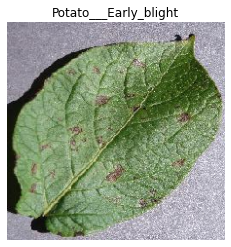

In [7]:
image_path = "D:/Tarun/PotatoEarlyBlight5.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img1 = np.expand_dims(img, axis=0)
img1 = img1/255

print("Prediction:")
prediction = classifier.predict(img1)

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = disname[index]
       
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
Total params: 34,944
Trainable params: 0
Non-trainable params: 34,944
_________________________________________________________________
<PIL.Image.Image image mode=RGB size=224x224 at 0x15087AD1E20>


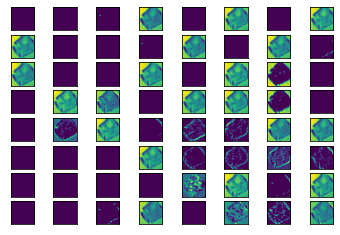

In [8]:
from keras.models import Model
from matplotlib import pyplot
model = load_model("AlexNetModel.hdf5")
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
image_path = "D:/Tarun/PEB6.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
print(new_img)
img = np.expand_dims(img, axis=0)
feature_maps = model.predict(img)
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[:, :, ix-1], cmap='viridis')
			ix += 1
	# show the figure
	pyplot.show()

In [9]:
from keras.models import Model
model = load_model("AlexNetModel.hdf5") 
print(model.layers[23].name)



dense_4


Prediction:


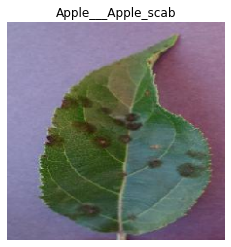

Dense Layer Output
tf.Tensor(
[[9.6983463e-01 2.7007090e-06 9.1410732e-07 2.6302390e-02 1.9127056e-06
  3.6460385e-06 1.6111258e-07 2.9832062e-08 3.2713987e-07 2.8111065e-06
  1.5123541e-07 2.9307281e-04 8.0394933e-08 5.4769185e-08 4.8264587e-10
  2.6524449e-03 1.0237127e-04 2.1520030e-07 5.6879594e-07 2.3754476e-10
  2.0481524e-08 2.4611631e-06 9.7021598e-08 8.6067759e-12 1.0674249e-07
  3.0102708e-08 1.2117272e-07 7.7316784e-09 1.4810706e-08 1.4293576e-07
  5.2927280e-09 7.7580474e-04 1.5605593e-07 2.2426602e-05 4.5169777e-08
  1.2854076e-08 1.1906526e-08 4.1799527e-08]], shape=(1, 38), dtype=float32)
tf.Tensor([0], shape=(1,), dtype=int64)
[0]


In [40]:

from keras.models import Model
image_path = "D:/Tarun/as.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img1 = np.expand_dims(img, axis=0)
img1 = img1/255

print("Prediction:")
prediction = classifier.predict(img1)

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = disname[index]
       
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()
print("Dense Layer Output")
data=np.array
layer_name = 'dense_4'
intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(img1)
print(intermediate_output)
a=tf.argmax(intermediate_output, axis=1, name=None) 
print(a)
b = tf.keras.backend.eval(a)
print(b)

Prediction:


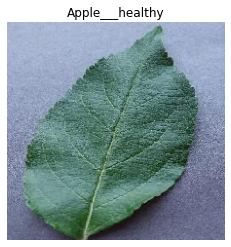

Dense Layer Output
tf.Tensor(
[[1.2957300e-04 3.2257500e-08 5.1776898e-09 9.9845636e-01 1.6428159e-05
  1.7660266e-06 4.2013248e-08 1.9635143e-08 8.7894065e-09 1.7650247e-08
  3.3695519e-06 9.3726529e-09 1.6557612e-08 3.6292715e-08 6.0822196e-09
  9.5642271e-08 5.1196383e-07 2.8110694e-07 3.3307415e-09 1.9681011e-05
  4.7720321e-05 3.8104656e-06 3.6428278e-07 4.8055804e-09 4.6410616e-05
  1.2617535e-07 7.5146653e-09 1.4426693e-06 2.8517029e-08 1.8754916e-06
  4.7494741e-06 1.2573452e-03 3.7464699e-06 7.6505972e-07 3.9782483e-07
  6.3343023e-08 7.9765613e-08 2.7601484e-06]], shape=(1, 38), dtype=float32)
tf.Tensor([3], shape=(1,), dtype=int64)
[3]


In [39]:
from keras.models import Model
image_path = "D:/Tarun/Apple_Healthy.JPG"
new_imgapple = image.load_img(image_path, target_size=(224, 224))
imgapple = image.img_to_array(new_imgapple)
imgapple1 = np.expand_dims(imgapple, axis=0)
imgapple1 = imgapple1/255

print("Prediction:")
prediction = classifier.predict(imgapple1)

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = disname[index]
       
plt.figure(figsize = (4,4))
plt.imshow(new_imgapple)
plt.axis('off')
plt.title(class_name)
plt.show()
print("Dense Layer Output")
data=np.array
layer_name = 'dense_4'
intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(imgapple1)
print(intermediate_output)
a=tf.argmax(intermediate_output, axis=1, name=None) 
print(a)
b = tf.keras.backend.eval(a)
print(b)